#### Google Colab Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

PROJECT_PATH = 'Colab Notebooks/CW_Folder_PG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', PROJECT_PATH)

#### Setting Environment, Installing packages

In [6]:
LIB_PATH = f"{GOOGLE_DRIVE_PATH}/requirements.txt"
!pip install -r "{LIB_PATH}"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00


#### Import tools and functions

In [7]:
%run "{GOOGLE_DRIVE_PATH}/Code/Tools.ipynb"
%run "{GOOGLE_DRIVE_PATH}/Code/Models.ipynb"

<ipython-input-7-6f9cfd3bdf37>:61: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


time: 537 ms (started: 2024-04-20 23:02:23 +00:00)


#### Visualize images using gradcam

In [8]:
imgs = ['2394', '2435','2550']

time: 615 µs (started: 2024-04-20 23:02:25 +00:00)


In [9]:
X_test, y_test = _import_data('test', filenames=imgs)

time: 1.87 s (started: 2024-04-20 23:02:25 +00:00)


#### SVM - HOG

In [10]:
# A function to evaluate model size
# _get_model_size(Path to selected model)

_get_model_size('SVM-HOG/20240404-233425.pkl')

Model Size: 12848115 byte
time: 259 ms (started: 2024-04-20 23:02:31 +00:00)


Accuracy: 0.8820960698689956
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        51
           1       0.92      0.94      0.93       388
           2       0.67      0.32      0.43        19

    accuracy                           0.88       458
   macro avg       0.73      0.63      0.66       458
weighted avg       0.88      0.88      0.88       458



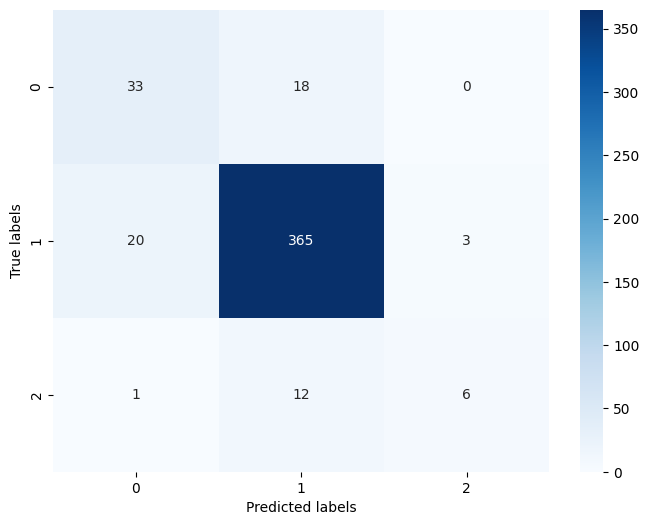

time: 2.98 s (started: 2024-04-20 23:02:33 +00:00)


In [11]:
# Without balancing and without augmentation
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'SVM-HOG', n='All', model_name='20240404-233425.pkl')

#### SVM - SIFT

In [12]:
# A function to evaluate model size
# _get_model_size(Path to selected model)

_get_model_size('SVM-SIFT/20240404-231342')

Model Size: 349955 byte
time: 517 ms (started: 2024-04-20 23:02:44 +00:00)


Accuracy: 0.6849015317286652
              precision    recall  f1-score   support

           0       0.30      0.75      0.43        51
           1       0.94      0.70      0.80       387
           2       0.11      0.26      0.16        19

    accuracy                           0.68       457
   macro avg       0.45      0.57      0.46       457
weighted avg       0.84      0.68      0.73       457



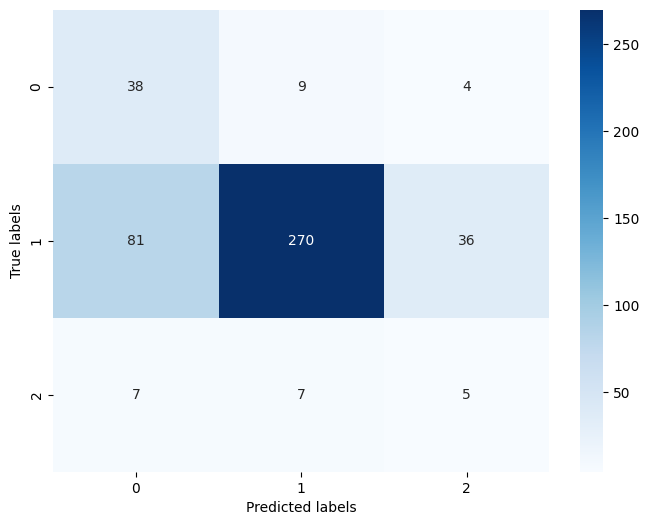

time: 2.51 s (started: 2024-04-20 23:02:45 +00:00)


In [13]:
# Without balancing and augmentation
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'SVM-SIFT', n='All', model_name='20240404-231342')

#### Custom CNN

In [14]:
# Best custom CNN model with augmentation
# A function to evaluate model size
# _get_model_size(Path to selected model)


_get_model_size('Custom-CNN/20240409-183732.h5')

Model Size: 4539456 byte
time: 260 ms (started: 2024-04-20 23:02:51 +00:00)


15/15 [==============================] - 2s 86ms/step
Accuracy: 0.925764192139738
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.95      0.96      0.96       388
           2       0.44      0.37      0.40        19

    accuracy                           0.93       458
   macro avg       0.75      0.73      0.74       458
weighted avg       0.92      0.93      0.92       458



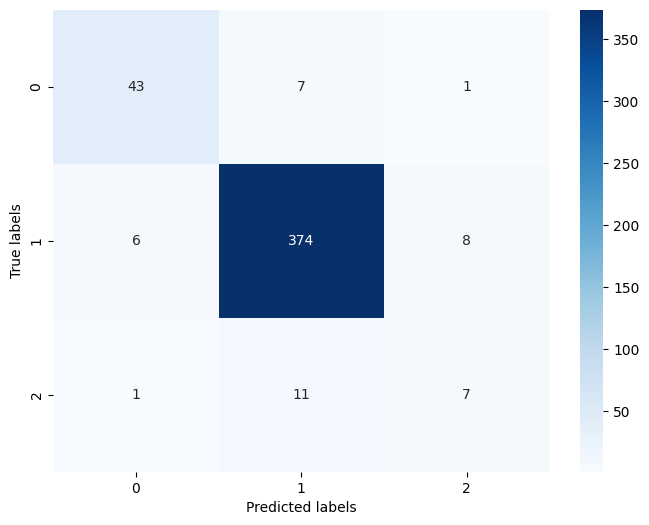

time: 5.13 s (started: 2024-04-20 23:02:52 +00:00)


In [15]:
# With augmentation
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'CustomCNN', n='All', model_name='20240409-183732.h5')

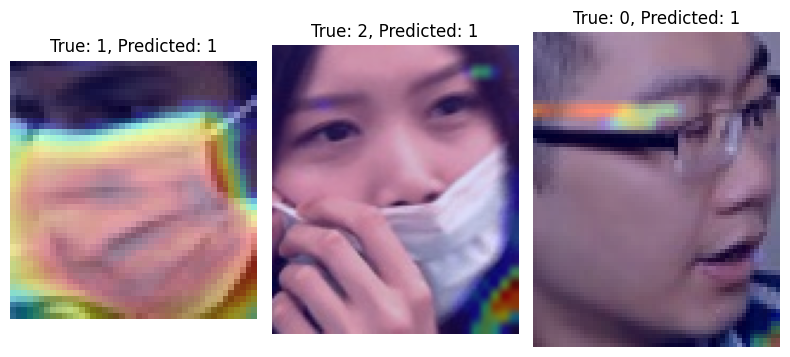

time: 1.03 s (started: 2024-04-20 23:03:00 +00:00)


In [16]:
_plot_gradcam(X_test, y_test, input_size=(64,64), last_conv='conv2d_723', model_path='Custom-CNN/20240409-183732.h5')

#### Pretrained-CNN : ResNet50

In [17]:
# Best Pretrained CNN model with augmentation
# A function to evaluate model size
# _get_model_size(Path to selected model)

_get_model_size('Pretrained-CNN/20240410-173718.h5')

Model Size: 94970824 byte
time: 355 ms (started: 2024-04-20 23:03:04 +00:00)


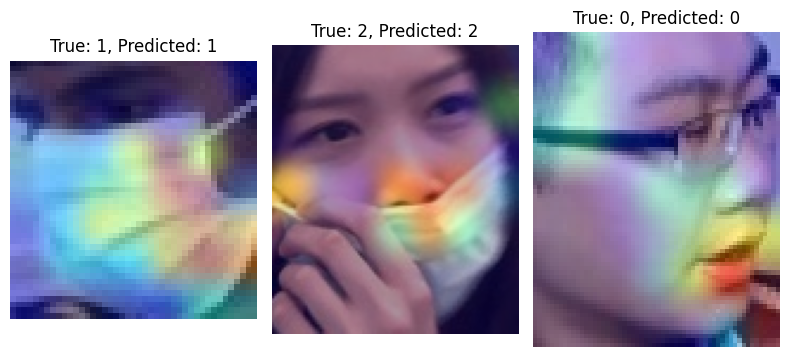

time: 16.5 s (started: 2024-04-20 23:03:05 +00:00)


In [18]:
_plot_gradcam(X_test, y_test, preprocess=resnet50_preprocess, last_conv='conv5_block3_out', model_path='Pretrained-CNN/20240410-173718.h5')

15/15 [==============================] - 87s 6s/step
Accuracy: 0.9672489082969432
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.97      1.00      0.98       388
           2       0.91      0.53      0.67        19

    accuracy                           0.97       458
   macro avg       0.95      0.81      0.86       458
weighted avg       0.97      0.97      0.96       458



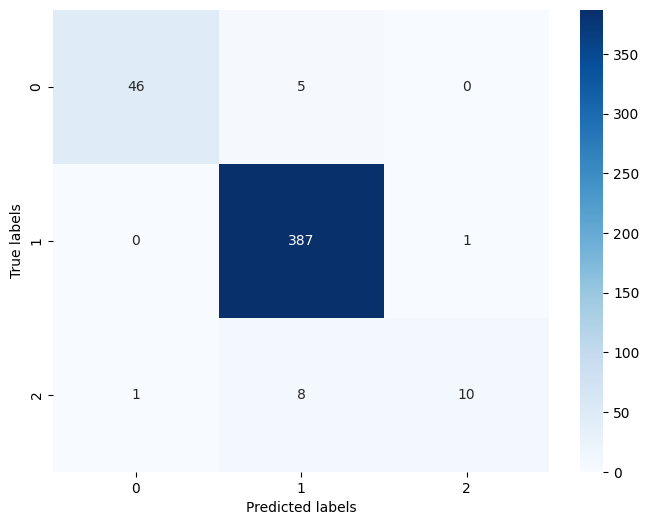

time: 2min 28s (started: 2024-04-20 23:03:21 +00:00)


In [19]:
# With augmentation
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'ResNet50', n='All', model_name='20240410-173718.h5')

#### Training with different preprocessing

15/15 [==============================] - 93s 6s/step
Accuracy: 0.9585152838427947
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        51
           1       0.96      1.00      0.98       388
           2       0.89      0.42      0.57        19

    accuracy                           0.96       458
   macro avg       0.94      0.76      0.82       458
weighted avg       0.96      0.96      0.95       458



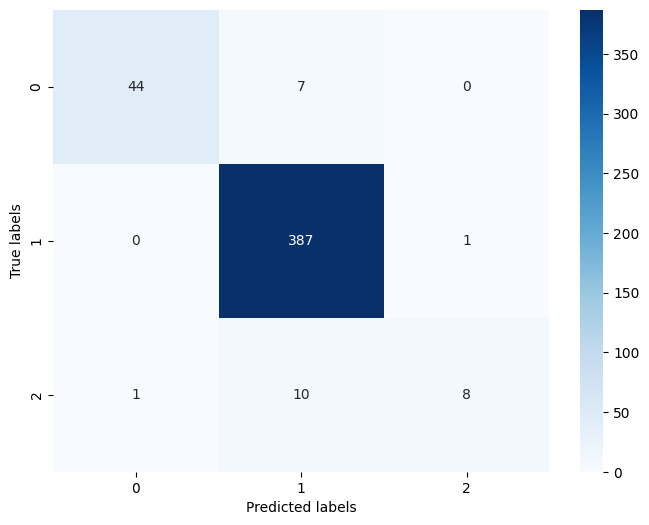

time: 2min 28s (started: 2024-04-19 13:49:48 +00:00)


In [ ]:
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'ResNet50', n='All', model_name='20240405-013410.h5')

15/15 [==============================] - 79s 5s/step
Accuracy: 0.9650655021834061
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.97      1.00      0.98       388
           2       1.00      0.42      0.59        19

    accuracy                           0.97       458
   macro avg       0.97      0.78      0.84       458
weighted avg       0.97      0.97      0.96       458



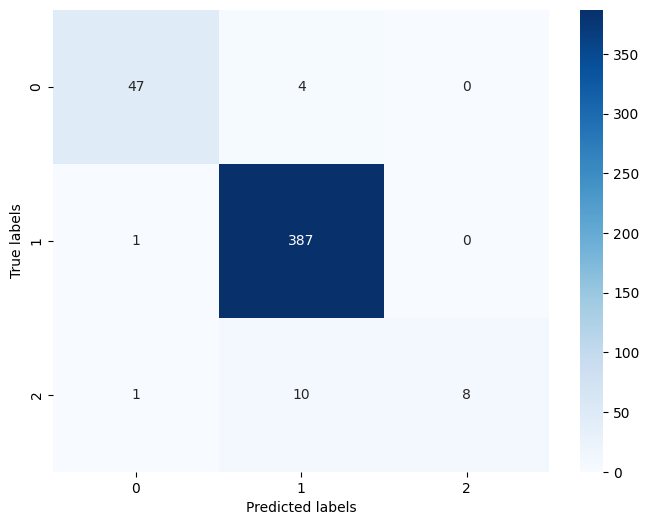

time: 1min 35s (started: 2024-04-17 13:14:56 +00:00)


In [ ]:
# With fine-tuning
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'ResNet50', n='All', model_name='20240405-100709.h5')

15/15 [==============================] - 80s 5s/step
Accuracy: 0.9563318777292577
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.98      0.98      0.98       388
           2       0.57      0.63      0.60        19

    accuracy                           0.96       458
   macro avg       0.83      0.84      0.83       458
weighted avg       0.96      0.96      0.96       458



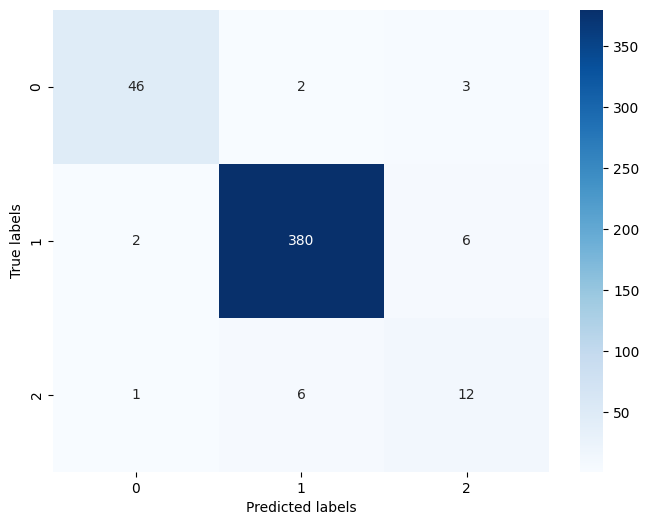

time: 1min 32s (started: 2024-04-17 13:19:02 +00:00)


In [ ]:
# With super-resolution
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'ResNet50', n='All', model_name='20240405-104657.h5')

15/15 [==============================] - 78s 5s/step
Accuracy: 0.962882096069869
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.98      0.98      0.98       388
           2       0.79      0.58      0.67        19

    accuracy                           0.96       458
   macro avg       0.89      0.83      0.86       458
weighted avg       0.96      0.96      0.96       458



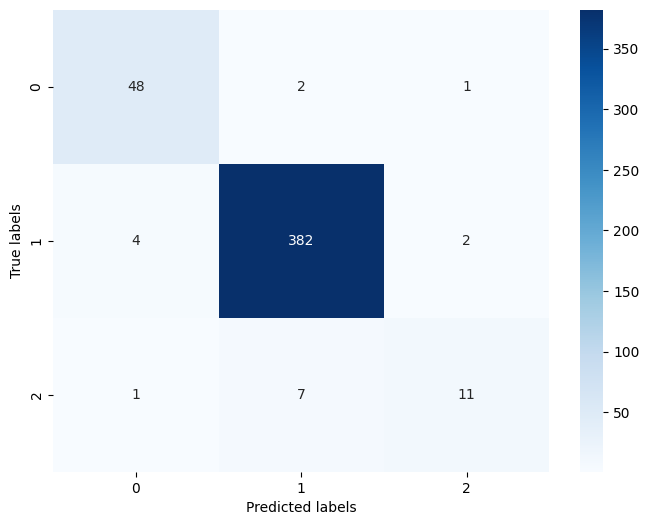

time: 1min 32s (started: 2024-04-17 13:20:35 +00:00)


In [ ]:
# With class weight
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'ResNet50', n='All', model_name='20240405-101644.h5')

15/15 [==============================] - 79s 5s/step
Accuracy: 0.9737991266375546
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.97      1.00      0.99       388
           2       1.00      0.47      0.64        19

    accuracy                           0.97       458
   macro avg       0.98      0.81      0.87       458
weighted avg       0.97      0.97      0.97       458



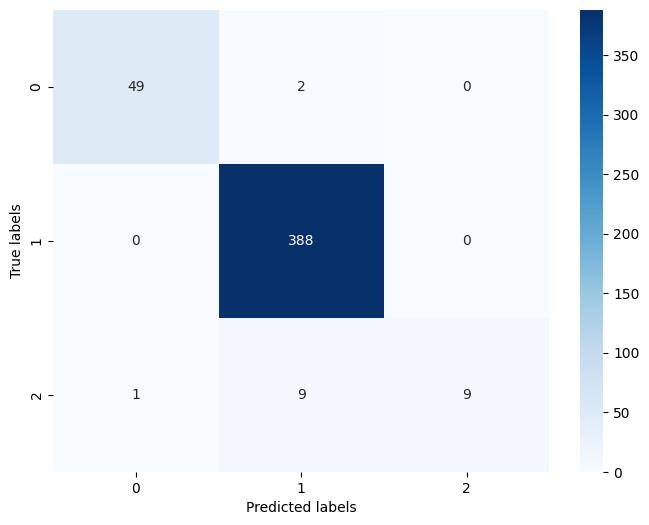

time: 1min 31s (started: 2024-04-17 13:22:07 +00:00)


In [ ]:
# With fine-tuning and weights
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'ResNet50', n='All', model_name='20240405-145850.h5')

15/15 [==============================] - 77s 5s/step
Accuracy: 0.9694323144104804
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.97      1.00      0.98       388
           2       1.00      0.42      0.59        19

    accuracy                           0.97       458
   macro avg       0.98      0.79      0.85       458
weighted avg       0.97      0.97      0.96       458



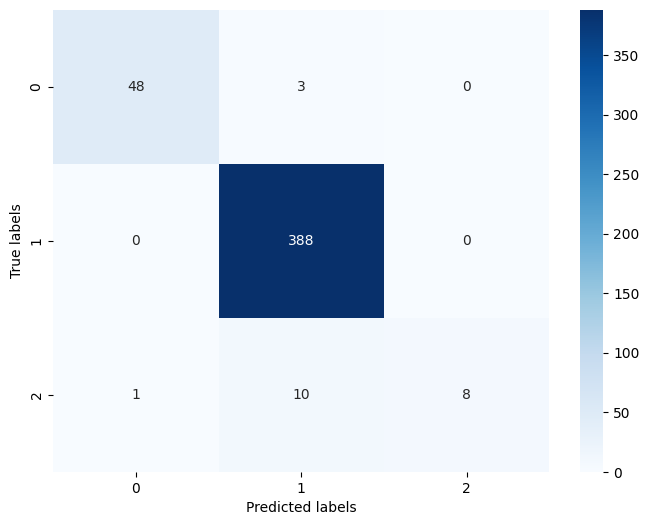

time: 1min 32s (started: 2024-04-17 13:23:38 +00:00)


In [ ]:
# With augmentation and fine-tuning
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'ResNet50', n='All', model_name='20240405-151135.h5')

#### Pretrained-CNN : MobileNet

In [20]:
# Best Pretrained CNN model with augmentation
# A function to evaluate model size
# _get_model_size(Path to selected model)

_get_model_size('Pretrained-CNN/20240405-092610.h5')

Model Size: 9561768 byte
time: 2.29 ms (started: 2024-04-20 23:06:03 +00:00)


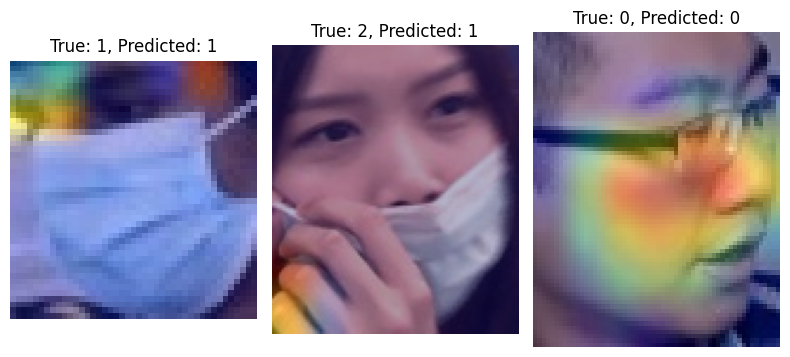

time: 8.58 s (started: 2024-04-20 23:06:04 +00:00)


In [21]:
_plot_gradcam(X_test, y_test, preprocess=mobilenet_preprocess, last_conv='Conv_1_bn', model_path='Pretrained-CNN/20240405-092610.h5')

15/15 [==============================] - 19s 1s/step
Accuracy: 0.9454148471615721
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        51
           1       0.96      0.99      0.97       388
           2       0.56      0.47      0.51        19

    accuracy                           0.95       458
   macro avg       0.82      0.75      0.78       458
weighted avg       0.94      0.95      0.94       458



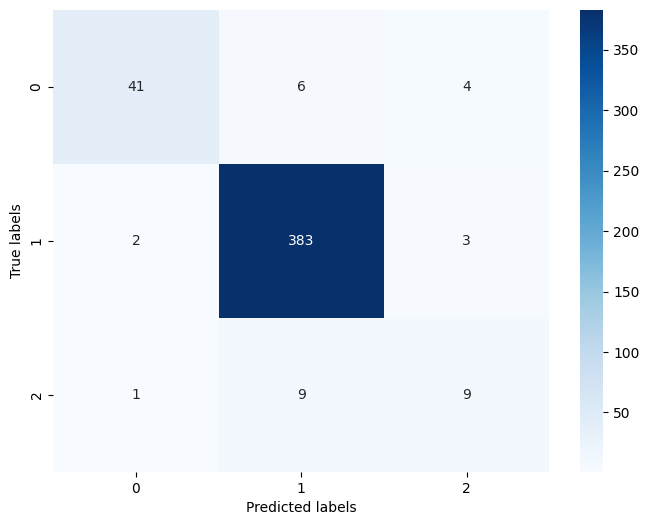

time: 25.3 s (started: 2024-04-20 23:06:12 +00:00)


In [22]:
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'MobileNet', n='All', model_name='20240405-092610.h5')

#### Training with different preprocessing

15/15 [==============================] - 17s 1s/step
Accuracy: 0.8362445414847162
              precision    recall  f1-score   support

           0       0.43      0.98      0.60        51
           1       0.97      0.86      0.91       388
           2       0.00      0.00      0.00        19

    accuracy                           0.84       458
   macro avg       0.47      0.61      0.50       458
weighted avg       0.87      0.84      0.84       458



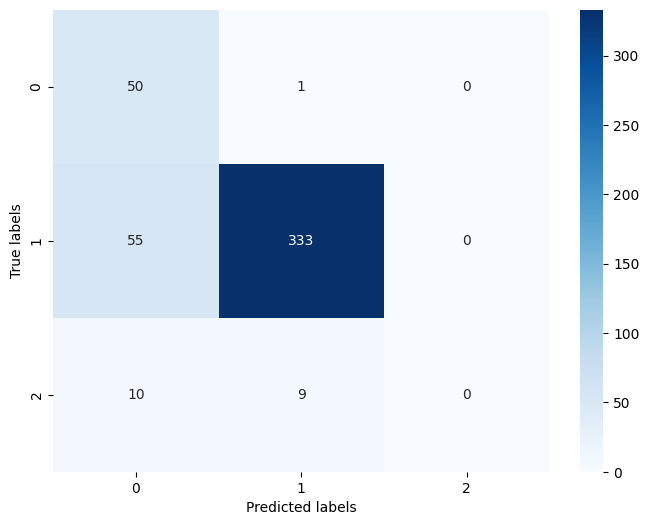

time: 27.7 s (started: 2024-04-17 13:25:32 +00:00)


In [ ]:
# With fine-tuning
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'MobileNet', n='All', model_name='20240405-092229.h5')

15/15 [==============================] - 16s 1s/step
Accuracy: 0.9410480349344978
              precision    recall  f1-score   support

           0       0.95      0.75      0.84        51
           1       0.95      0.99      0.97       388
           2       0.62      0.42      0.50        19

    accuracy                           0.94       458
   macro avg       0.84      0.72      0.77       458
weighted avg       0.94      0.94      0.94       458



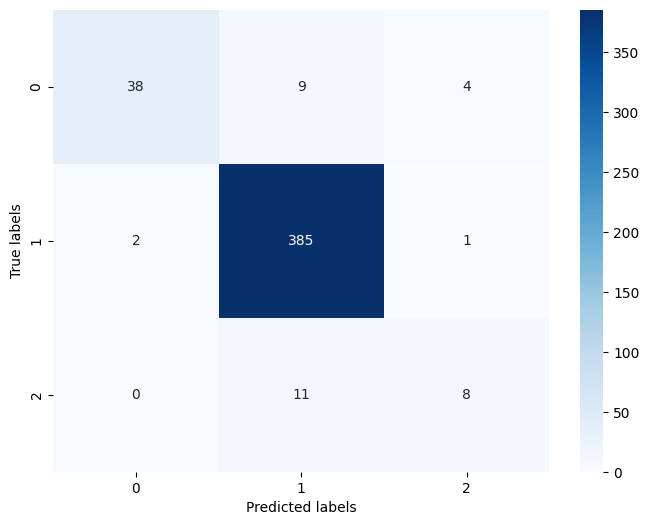

time: 25.9 s (started: 2024-04-17 13:25:59 +00:00)


In [ ]:
# With augmentation
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'MobileNet', n='All', model_name='20240405-093232.h5')

15/15 [==============================] - 17s 1s/step
Accuracy: 0.9104803493449781
              precision    recall  f1-score   support

           0       0.72      0.84      0.77        51
           1       0.98      0.94      0.96       388
           2       0.41      0.58      0.48        19

    accuracy                           0.91       458
   macro avg       0.70      0.79      0.74       458
weighted avg       0.93      0.91      0.92       458



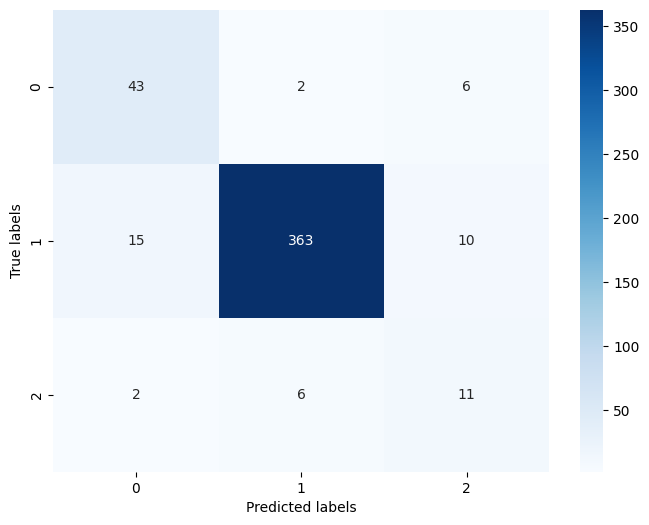

time: 26.3 s (started: 2024-04-17 13:26:25 +00:00)


In [ ]:
# With weights
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'MobileNet', n='All', model_name='20240405-093427.h5')

#### Pretrained-CNN : VGG16

In [23]:
# Best Pretrained CNN model with augmentation
# A function to evaluate model size
# _get_model_size(Path to selected model)

_get_model_size('Pretrained-CNN/20240405-163933.h5')

Model Size: 58952768 byte
time: 2.26 ms (started: 2024-04-20 23:06:45 +00:00)


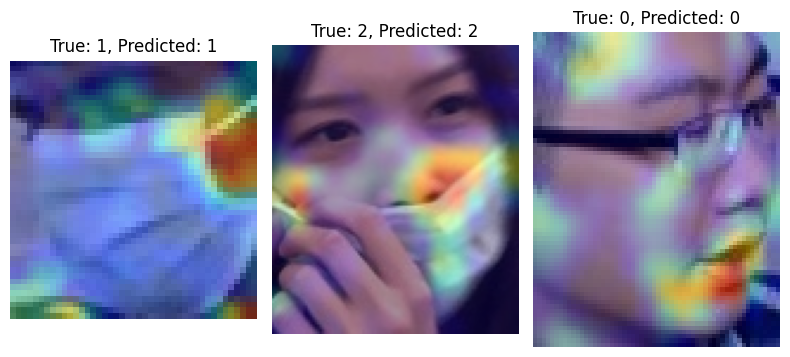

time: 12.8 s (started: 2024-04-20 23:06:45 +00:00)


In [24]:
_plot_gradcam(X_test, y_test, preprocess=vgg16_preprocess, last_conv='block5_conv3', model_path='Pretrained-CNN/20240405-163933.h5')

15/15 [==============================] - 252s 17s/step
Accuracy: 0.9541484716157205
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.96      0.99      0.98       388
           2       0.75      0.47      0.58        19

    accuracy                           0.95       458
   macro avg       0.88      0.78      0.82       458
weighted avg       0.95      0.95      0.95       458



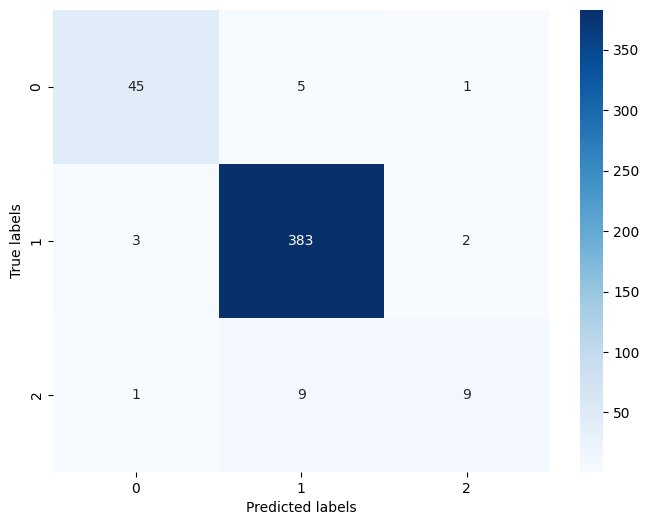

time: 4min 24s (started: 2024-04-20 23:06:58 +00:00)


In [25]:
# With augmentation
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'VGG16', n='All', model_name='20240405-163933.h5')

#### Training with different preprocessing

15/15 [==============================] - 249s 17s/step
Accuracy: 0.9519650655021834
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        51
           1       0.96      0.99      0.97       388
           2       0.75      0.47      0.58        19

    accuracy                           0.95       458
   macro avg       0.88      0.77      0.81       458
weighted avg       0.95      0.95      0.95       458



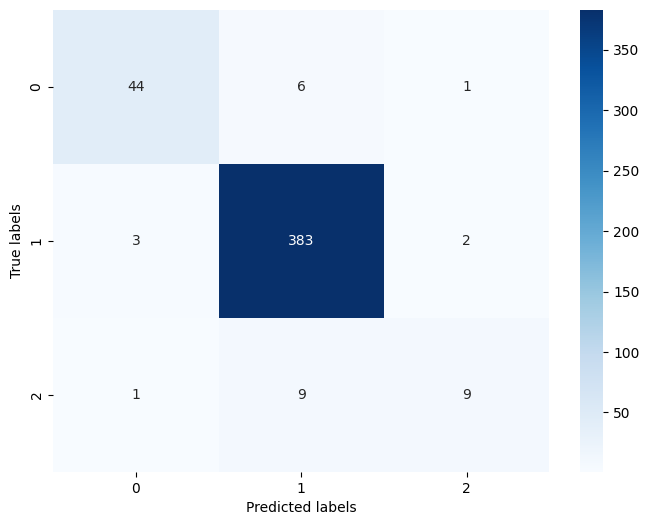

time: 4min 35s (started: 2024-04-17 13:26:52 +00:00)


In [ ]:
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'VGG16', n='All', model_name='20240405-162448.h5')

15/15 [==============================] - 250s 17s/step
Accuracy: 0.8930131004366813
              precision    recall  f1-score   support

           0       0.67      0.92      0.78        51
           1       0.96      0.91      0.94       388
           2       0.41      0.47      0.44        19

    accuracy                           0.89       458
   macro avg       0.68      0.77      0.72       458
weighted avg       0.91      0.89      0.90       458



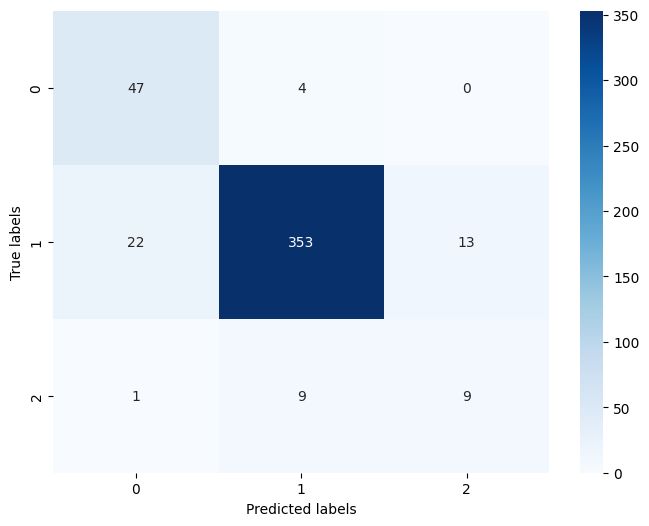

time: 4min 28s (started: 2024-04-17 13:35:55 +00:00)


In [ ]:
# With weights
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'VGG16', n='All', model_name='20240407-184307.h5')

15/15 [==============================] - 243s 16s/step
Accuracy: 0.9301310043668122
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        51
           1       0.95      0.97      0.96       388
           2       0.83      0.26      0.40        19

    accuracy                           0.93       458
   macro avg       0.86      0.69      0.73       458
weighted avg       0.93      0.93      0.92       458



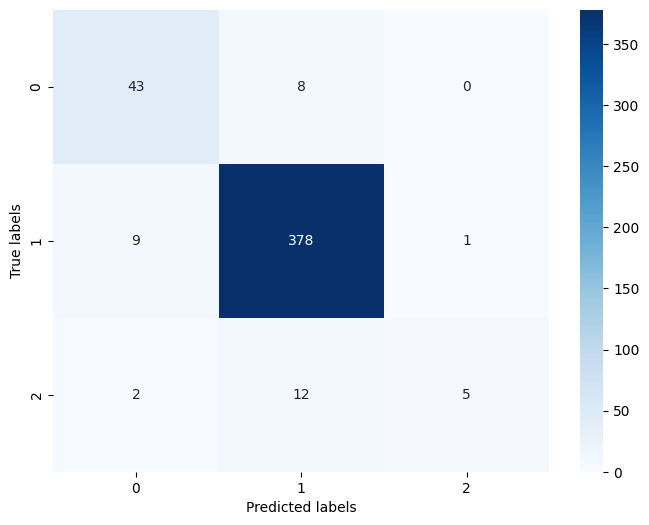

time: 4min 8s (started: 2024-04-17 13:40:23 +00:00)


In [ ]:
# With super-resolution
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'VGG16', n='All', model_name='20240407-184720.h5')

#### Pretrained-CNN : EfficientNetB0

In [26]:
# Best Pretrained CNN model with augmentation
# A function to evaluate model size
# _get_model_size(Path to selected model)

_get_model_size('Pretrained-CNN/20240410-170150.h5')

Model Size: 16904776 byte
time: 3.16 ms (started: 2024-04-20 23:11:22 +00:00)


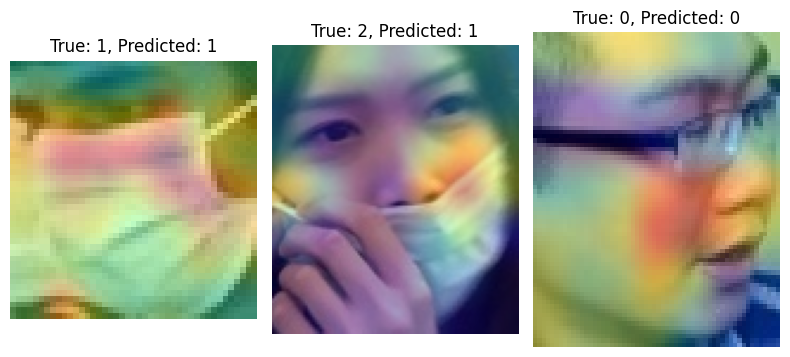

time: 13.9 s (started: 2024-04-20 23:11:22 +00:00)


In [27]:
_plot_gradcam(X_test, y_test, preprocess=efficientnet_preproces, last_conv='top_conv', model_path='Pretrained-CNN/20240410-170150.h5')

15/15 [==============================] - 36s 2s/step
Accuracy: 0.9563318777292577
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        51
           1       0.96      0.99      0.98       388
           2       0.89      0.42      0.57        19

    accuracy                           0.96       458
   macro avg       0.93      0.76      0.82       458
weighted avg       0.95      0.96      0.95       458



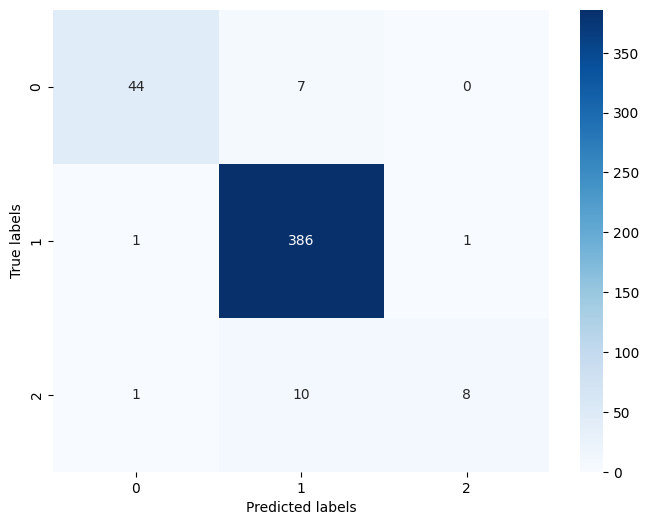

time: 46.9 s (started: 2024-04-20 23:11:36 +00:00)


In [28]:
# With augmentation
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'EfficientNet', n='All', model_name='20240410-170150.h5')

#### Training with different preprocessing

15/15 [==============================] - 30s 2s/step
Accuracy: 0.9454148471615721
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        51
           1       0.96      0.99      0.97       388
           2       0.64      0.37      0.47        19

    accuracy                           0.95       458
   macro avg       0.84      0.73      0.77       458
weighted avg       0.94      0.95      0.94       458



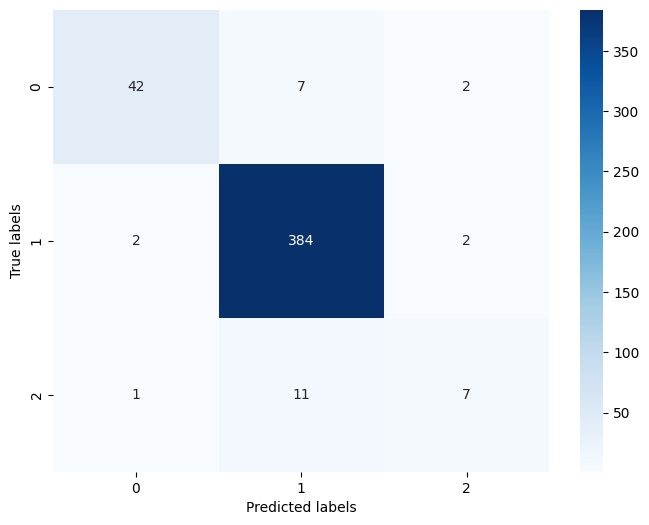

time: 49.5 s (started: 2024-04-17 13:44:32 +00:00)


In [ ]:
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'EfficientNet', n='All', model_name='20240405-153333.h5')

15/15 [==============================] - 30s 2s/step
Accuracy: 0.9475982532751092
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        51
           1       0.98      0.97      0.97       388
           2       0.56      0.47      0.51        19

    accuracy                           0.95       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.95      0.95      0.95       458



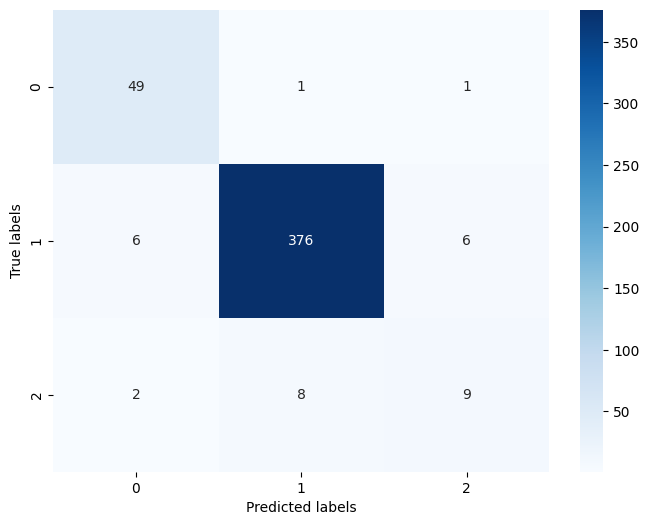

time: 47.8 s (started: 2024-04-17 13:45:21 +00:00)


In [ ]:
# With fine-tuning
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'EfficientNet', n='All', model_name='20240405-153806.h5')

15/15 [==============================] - 30s 2s/step
Accuracy: 0.9366812227074236
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        51
           1       0.95      0.98      0.97       388
           2       0.50      0.37      0.42        19

    accuracy                           0.94       458
   macro avg       0.79      0.71      0.75       458
weighted avg       0.93      0.94      0.93       458



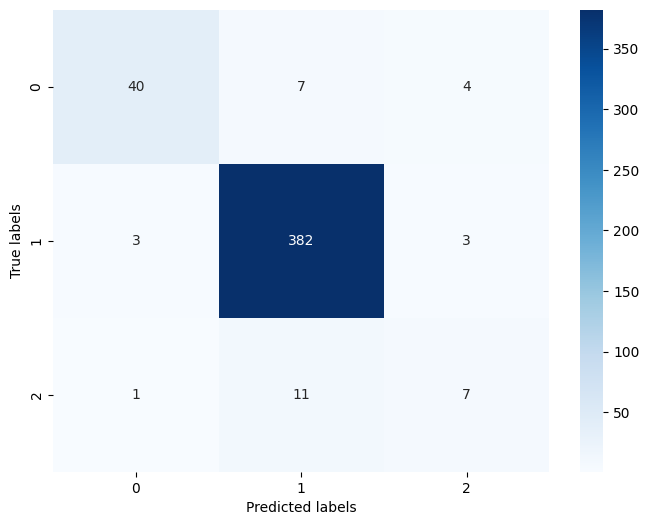

time: 47.7 s (started: 2024-04-17 13:46:44 +00:00)


In [ ]:
# With weights
# A function to predict entire test set, returning classification report, and confusion matrix
# MaskDetection(Path to test data, Type of model, Number of test set to be predicted, model name)

MaskDetection('test', 'EfficientNet', n='All', model_name='20240405-154937.h5')